In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
data = pd.read_csv('fertilizer_recommendation.csv')
data.head()

,Temperature,Humidity,Moisture,Soil Type,Crop Type,N,K,P,Fertilizer
0,26.0,52.0,38.0,Sandy,Maize,37,0,0,Urea
1,29.0,52.0,45.0,Loamy,Sugarcane,12,0,36,DAP
2,34.0,65.0,62.0,Black,Cotton,7,9,30,14-35-14
3,32.0,62.0,34.0,Red,Tobacco,22,0,20,28-28
4,28.0,54.0,46.0,Clayey,Rice,35,0,0,Urea


In [3]:
# Define the number of augmented samples to create for each original sample
# increase dataset from 100 rows to 500


# num_augmented_samples = 3

# augmented_data = []

# for index, row in dataset.iterrows():
#     original_sample = row.to_dict()
#     augmented_samples = []

#     for _ in range(num_augmented_samples):
#         augmented_sample = original_sample.copy()
#         augmented_sample['Temparature'] += np.random.normal(0, 0.1)
#         augmented_sample['Humidity'] += np.random.normal(0, 0.1)
#         augmented_sample['Moisture'] += np.random.normal(0, 0.1)
#         augmented_sample['Nitrogen'] += np.random.normal(0, 0.1)
#         augmented_sample['Potassium'] += np.random.normal(0, 0.1)
#         augmented_sample['Phosphorous'] += np.random.normal(0, 0.1)
#         # Add more transformations for other columns as needed
#         augmented_samples.append(augmented_sample)


#     augmented_data.extend(augmented_samples)

# # Convert the augmented data to a DataFrame
# augmented_dataset = pd.DataFrame(augmented_data)

# # Concatenate the original dataset
# data = pd.concat([dataset, augmented_dataset], ignore_index=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  8000 non-null   float64
 1   Humidity     8000 non-null   float64
 2   Moisture     8000 non-null   float64
 3   Soil Type    8000 non-null   object 
 4   Crop Type    8000 non-null   object 
 5   N            8000 non-null   int64  
 6   K            8000 non-null   int64  
 7   P            8000 non-null   int64  
 8   Fertilizer   8000 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 562.6+ KB


In [5]:
#changing the column names
data.rename(columns={'Humidity ':'Humidity','Soil Type':'Soil_Type','Crop Type':'Crop_Type','Fertilizer Name':'Fertilizer'},inplace=True)

In [6]:
#checking unique values
data.nunique()

,0
Temperature,1816
Humidity,3004
Moisture,3723
Soil_Type,5
Crop_Type,11
N,46
K,24
P,47
Fertilizer,7


In [7]:
#checking for null values
data.isna().sum()

,0
Temperature,0
Humidity,0
Moisture,0
Soil_Type,0
Crop_Type,0
N,0
K,0
P,0
Fertilizer,0


In [8]:
data['Fertilizer'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [9]:
data['Crop_Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Rice', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [10]:
#statistical parameters
data.describe(include='all')

,Temperature,Humidity,Moisture,Soil_Type,Crop_Type,N,K,P,Fertilizer
count,8000.000000,8000.000000,8000.000000,8000,8000,8000.000000,8000.000000,8000.000000,8000
unique,NaN,NaN,NaN,5,11,NaN,NaN,NaN,7
top,NaN,NaN,NaN,Clayey,Sugarcane,NaN,NaN,NaN,14-35-14
freq,NaN,NaN,NaN,1623,763,NaN,NaN,NaN,1188
mean,30.338895,59.210731,43.580862,NaN,NaN,18.429125,3.916375,18.512500,NaN
std,4.478262,8.177366,12.596156,NaN,NaN,11.852406,5.494807,13.244113,NaN
min,20.000000,40.020000,20.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,27.050000,53.277500,33.967500,NaN,NaN,9.000000,0.000000,8.000000,NaN
50%,30.240000,59.110000,42.250000,NaN,NaN,14.000000,1.000000,18.000000,NaN
75%,33.460000,65.082500,52.950000,NaN,NaN,26.000000,5.000000,30.000000,NaN


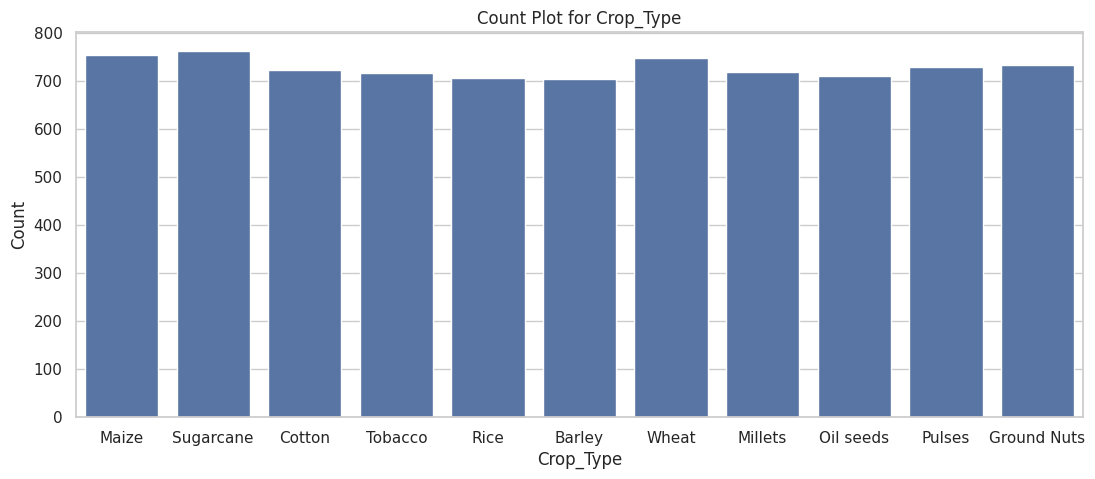

In [11]:
plt.figure(figsize=(13, 5))
sns.set(style="whitegrid")
sns.countplot(data=data, x='Crop_Type')
plt.title('Count Plot for Crop_Type')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.show()

In [12]:
#The plot that shows the count (frequency) of each unique crop type in the dataset
#The x-axis represents the different crop types.
#The y-axis represents the count (the number of occurrences) of each crop type in the dataset

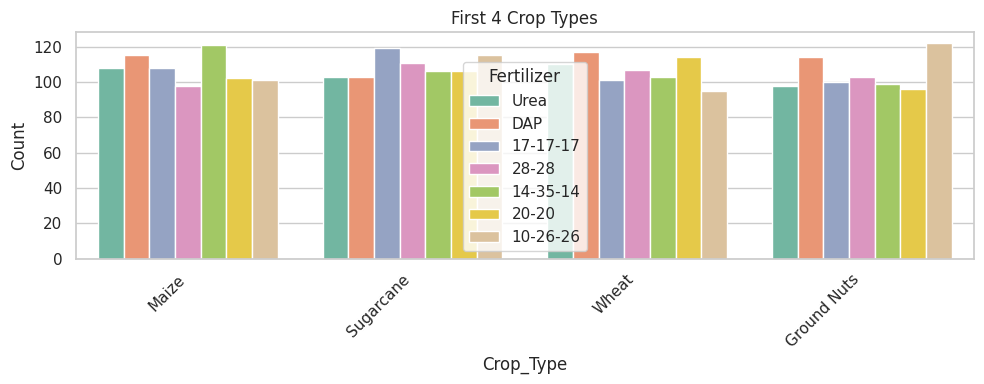

In [13]:

#first 4 crop types
part1_data = data[data['Crop_Type'].isin(data['Crop_Type'].value_counts().index[:4])]

# Create the first countplot
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")
sns.countplot(data=part1_data, x='Crop_Type', hue='Fertilizer', width=0.8, palette='Set2')
plt.title('First 4 Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()


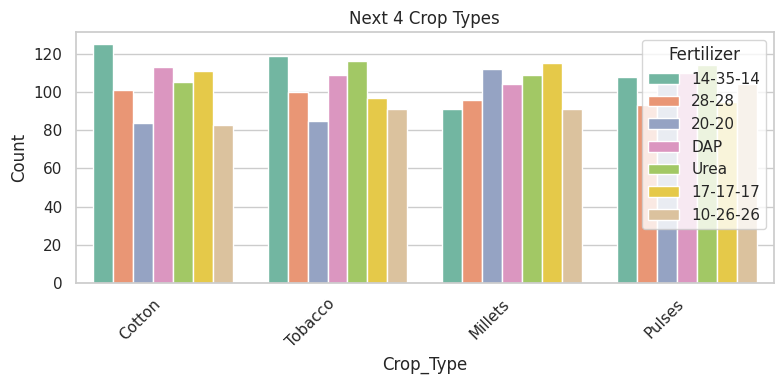

In [14]:
# Split the data into three parts: next 4 crop types
part2_data = data[data['Crop_Type'].isin(data['Crop_Type'].value_counts().index[4:8])]

# Create the second countplot
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.countplot(data=part2_data, x='Crop_Type', hue='Fertilizer', width=0.8, palette='Set2')
plt.title('Next 4 Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()


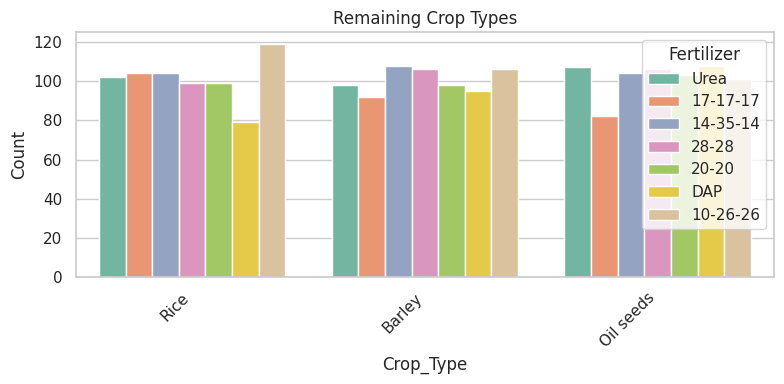

In [15]:
# Split the data into three parts: remaining crop types
part3_data = data[data['Crop_Type'].isin(data['Crop_Type'].value_counts().index[8:13])]

# Create the third countplot
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.countplot(data=part3_data, x='Crop_Type', hue='Fertilizer', width=0.8, palette='Set2')
plt.title('Remaining Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()


In [16]:
#  this plot is provides insights into how different crop types are distributed based on the type of fertilizer used.
# The x-axis represents the different crop types.
# The y-axis represents the count (the number of occurrences) of each crop type in the dataset.

In [17]:
#Heatmap for Correlation Analysis
sns.heatmap(data.corr(),annot=True)

ValueError: could not convert string to float: 'Sandy'

In [ ]:
#here is no such correlation between any of variables..

In [ ]:
#encoding the labels for categorical variables
from sklearn.preprocessing import LabelEncoder
#it  transforming non-numeric data into a numeric format

In [ ]:
#encoding Soil Type variable
encode_soil = LabelEncoder()

#fitting the label encoder
data.Soil_Type = encode_soil.fit_transform(data.Soil_Type)

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

In [ ]:
#encoding Crop Type variable
encode_crop = LabelEncoder()

#fitting the label encoder
data.Crop_Type = encode_crop.fit_transform(data.Crop_Type)

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

In [ ]:
#encoding Fertilizer variable
encode_ferti = LabelEncoder()

#fitting the label encoder
data.Fertilizer = encode_ferti.fit_transform(data.Fertilizer)

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

In [ ]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop('Fertilizer',axis=1),data.Fertilizer,test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

In [ ]:
# here 20% of the data should be used for testing (evaluation), and the remaining 80% is used for training
#x_train and x_test = contain the features (independent variables) used for training and testing the model
#y_train and y_test = contains the labels(dependent variable) used for training and testing the model.

In [ ]:
x_train.info()

In [ ]:
acc = [] # TEST
model = []
acc1=[] # TRIAN

### Logistic regression model

In [ ]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

ds = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
ds.fit(x_train,y_train)

predicted_values = ds.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')

predicted_values = ds.predict(x_train)
y = metrics.accuracy_score(y_train, predicted_values)
acc1.append(y)

print("DecisionTrees's Accuracy is: ", x*100, y*100)

print(classification_report(y_test,predicted_values))

In [ ]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(x_train,y_train)

predicted_values = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)

predicted_values = NaiveBayes.predict(x_train)
y = metrics.accuracy_score(y_train, predicted_values)
acc1.append(y)

model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x,y)

print(classification_report(y_test,predicted_values))

In [ ]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(x_train)
X_train_norm = norm.transform(x_train)
# transform testing dataabs
X_test_norm = norm.transform(x_test)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,y_train)

predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)

predicted_values = SVM.predict(X_train_norm)
y = metrics.accuracy_score(y_train, predicted_values)
acc1.append(y)

model.append('SVM')
print("SVM's Accuracy is: ", x,y)

print(classification_report(y_test,predicted_values))

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(x_train,y_train)

predicted_values = LogReg.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)

predicted_values = LogReg.predict(x_train)
y = metrics.accuracy_score(y_train, predicted_values)
acc1.append(y)

model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x,y)

print(classification_report(y_test,predicted_values))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)

predicted_values = RF.predict(x_train)
y = metrics.accuracy_score(y_train, predicted_values)
acc1.append(y)

model.append('RF')
print("RF's Accuracy is: ", x,y)

print(classification_report(y_test,predicted_values))

In [ ]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(RF,data,data.Fertilizer,cv=5)
print("Cross-validation score of RF is:",score)
score = cross_val_score(LogReg,data,data.Fertilizer,cv=5)
print("Cross-validation score of LogReg is:",score)
score = cross_val_score(SVM,data,data.Fertilizer,cv=5)
print("Cross-validation score of SVM is:",score)
score = cross_val_score(NaiveBayes,data,data.Fertilizer,cv=5)
print("Cross-validation score of NaiveBayes is:",score)
score = cross_val_score(ds, data, data.Fertilizer,cv=5)
print("Cross-validation score of ds is:",score)

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [ ]:
#pickling the file
import pickle
pickle_out = open('classifier.pkl','wb')
pickle.dump(RF,pickle_out)
pickle_out.close()

In [ ]:
model = pickle.load(open('classifier.pkl','rb'))
model.predict([[34,67,62,0,1,7,0,30]])

In [ ]:
model = pickle.load(open('classifier.pkl','rb'))
model.predict([[25,78,43,4,1,22,26,38]])

In [ ]:
#pickling the file
import pickle
pickle_out = open('fertilizer.pkl','wb')
pickle.dump(encode_ferti,pickle_out)
pickle_out.close()

In [ ]:
ferti = pickle.load(open('fertilizer.pkl','rb'))
ferti.classes_[1]